In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Reflect Tables into SQLAlchemy ORM

In this section, you’ll use Python and SQLAlchemy to do a basic climate analysis and data exploration of your climate database. Specifically, you’ll use SQLAlchemy ORM queries, Pandas, and Matplotlib. To do so, complete the following steps:

Note that you’ll use the provided files (climate_starter.ipynb and hawaii.sqlite) to complete your climate analysis and data exploration.

1- Use the SQLAlchemy create_engine() function to connect to your SQLite database.

2 - Use the SQLAlchemy automap_base() function to reflect your tables into classes, and then save references to the classes named station and measurement.

3- Link Python to the database by creating a SQLAlchemy session.

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,Column, Integer, String, Float, Date
from sqlalchemy.sql import text


In [33]:
# 1- create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:/Users/aumek/OneDrive/Desktop/Git_Personnal_Rep/sqlalchemy-challenge/sqlalchemy-challenge/Starter_Code/Resources/hawaii.sqlite")

inspector = inspect(engine)
print(inspector)

In [34]:
# 2- reflect an existing database into a new model -- The automap_base function generates a base class//the prepare function maps the database tables
Base= automap_base()

Base.metadata.create_all(engine)

# reflect the tables
Base.prepare(autoload_with=engine)

In [35]:
# View all of the classes that automap found (name of the tables we will populate from the csv.files using the 'Base.prepare')
print(Base.classes.keys())

#also could use inspect to call the table names.

['measurement', 'station']


In [36]:
#validate the datatype for the tables above to explore the content
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [37]:
# Save references to each table

Mst = Base.classes.measurement
St = Base.classes.station


In [40]:
# 3-Create our session (link) from Python to the DB
session = Session(bind=engine)


In [41]:
#validate datatype of the records:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [42]:
#display the rows in class / table measurement
for row in session.query(Mst.id, Mst.station, Mst.date,Mst.prcp, Mst.tobs).limit(10).all():
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [43]:
#validate datatype of the records:
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [44]:
#display the rows in class / table station
for row in session.query(St.id, St.station, St.latitude, St.longitude, St.elevation).limit(10).all():
    print(row)

(1, 'USC00519397', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 21.3331, -157.8025, 152.4)


In [45]:
#close session
session.close()

# Exploratory Precipitation Analysis

In [46]:
#join the tables 

sel = [Mst.id, Mst.station, Mst.date, Mst.prcp, Mst.tobs, St.id, St.station, St.name, St.latitude, St.longitude, St.elevation]


join_tables = session.query(*sel).filter(Mst.station == St.station).limit(5).all()

for record in join_tables:
    (mst_id, mst_station, mst_date, mst_prcp, mst_tobs, st_id, st_station, st_name, st_latitude, st_longitude, st_elevation) = record
    print(f"Mst id: {mst_id}, Mst station: {mst_station}, Mst date: {mst_date}, Mst prcp: {mst_prcp}, Mst tobs: {mst_tobs}, St id: {st_id}, St station: {st_station}, St name: {st_name}, St latitude: {st_latitude}, St longitude: {st_longitude}, St elevation: {st_elevation}")


Mst id: 1, Mst station: USC00519397, Mst date: 2010-01-01, Mst prcp: 0.08, Mst tobs: 65.0, St id: 1, St station: USC00519397, St name: WAIKIKI 717.2, HI US, St latitude: 21.2716, St longitude: -157.8168, St elevation: 3.0
Mst id: 2, Mst station: USC00519397, Mst date: 2010-01-02, Mst prcp: 0.0, Mst tobs: 63.0, St id: 1, St station: USC00519397, St name: WAIKIKI 717.2, HI US, St latitude: 21.2716, St longitude: -157.8168, St elevation: 3.0
Mst id: 3, Mst station: USC00519397, Mst date: 2010-01-03, Mst prcp: 0.0, Mst tobs: 74.0, St id: 1, St station: USC00519397, St name: WAIKIKI 717.2, HI US, St latitude: 21.2716, St longitude: -157.8168, St elevation: 3.0
Mst id: 4, Mst station: USC00519397, Mst date: 2010-01-04, Mst prcp: 0.0, Mst tobs: 76.0, St id: 1, St station: USC00519397, St name: WAIKIKI 717.2, HI US, St latitude: 21.2716, St longitude: -157.8168, St elevation: 3.0
Mst id: 5, Mst station: USC00519397, Mst date: 2010-01-06, Mst prcp: None, Mst tobs: 73.0, St id: 1, St station: US

In [62]:
# Find the most recent date in the data set.
most_recent_date = session.query(Mst.date).order_by(Mst.date.desc()).first()
most_recent_date_str = most_recent_date[0] 
print(most_recent_date_str)

2017-08-23


In [63]:
# Starting from the most recent data point in the database. 
one_year_ago = (dt.datetime.strptime(most_recent_date_str, '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
print(one_year_ago)

2016-08-23


In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#This should display any date starting a year ago 2016-08-23 until most recent
last_12_months = session.query(Mst.date, Mst.prcp).\
    filter(Mst.date >= one_year_ago).\
    order_by(Mst.date).all()
print(last_12_months)

[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9),

In [75]:
# Calculate the date one year from the last date in data set.

one_year_ago_calc = most_recent_date - dt.timedelta(days=365)
print(one_year_ago_calc)

2016-08-23


In [77]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Mst.date, Mst.prcp).filter(Mst.date >= one_year_ago).all()

In [78]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date_df = pd.DataFrame(results, columns=['date', 'prcp']).set_index('date')
date_df.to_csv('date_prcp.csv', header=True)

In [107]:
# Sort the dataframe by date

date_df_sorted = date_df.sort_values('date')
date_df_sorted = date_df_sorted.dropna(subset=['prcp']) #drop any NA value from column prcp
date_df_sorted_filtered = date_df_sorted.loc[date_df_sorted['prcp'] > 0] #drop any zero value from column prcp
date_df_sorted_filtered

,prcp
date,
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
...,...
2017-08-21,0.56
2017-08-21,0.02
2017-08-22,0.50


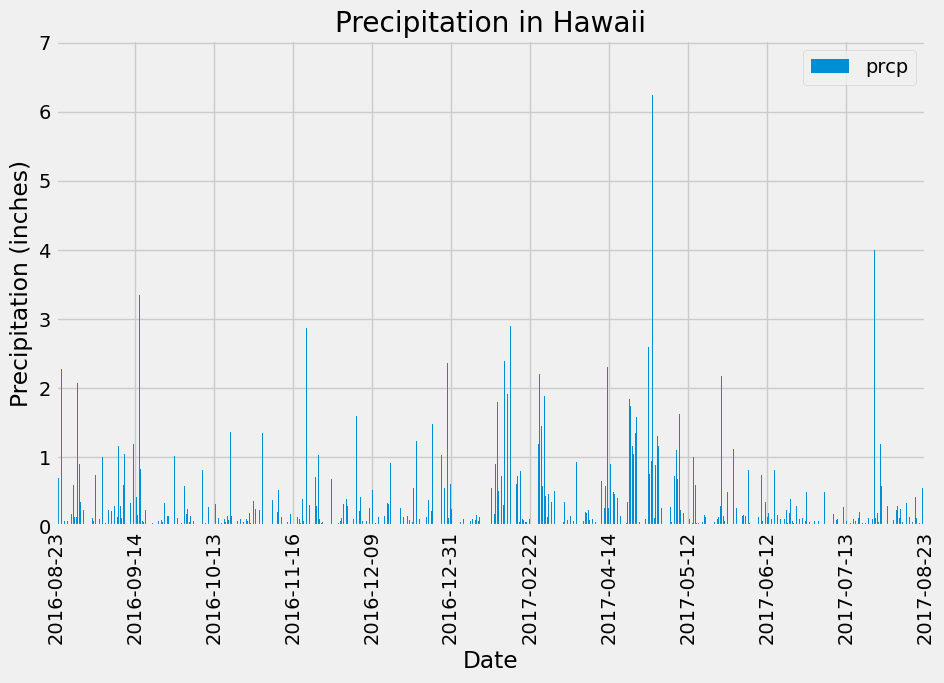

In [108]:
date_df_sorted_filtered.plot(kind='bar', y='prcp', figsize=(10, 6))

# Limit the number of x-axis ticks to 12
ticks = np.linspace(0, len(date_df_sorted_filtered.index)-1, 12).astype(int)
plt.xticks(ticks, date_df_sorted_filtered.index[ticks])

# Set chart labels and title
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation in Hawaii")

# Show the chart
plt.show()


In [109]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = date_df_sorted_filtered['prcp'].describe()

# Print the summary statistics
print(summary_stats)

count    1147.000000
mean        0.312363
std         0.576781
min         0.010000
25%         0.030000
50%         0.100000
75%         0.310000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [113]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(St.station)).scalar()
print(total_stations)

9


In [124]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Mst.station, func.count(Mst.station))\
                         .group_by(Mst.station)\
                         .order_by(func.count(Mst.station).desc())\
                         .all()
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [167]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
for station, count in active_stations:
    temperature_stats = session.query(func.min(Mst.tobs), func.max(Mst.tobs), func.avg(Mst.tobs)).\
                        filter(Mst.station == station).\
                        all()
    
# Print the temperature statistics
print(f"Temperature statistics for the most active station {station}:")
print(f"Lowest temperature: {temperature_stats[0][0]}")
print(f"Highest temperature: {temperature_stats[0][1]}")
print(f"Average temperature: {temperature_stats[0][2]:.2f}")

Temperature statistics for the most active station USC00518838:
Lowest temperature: 58.0
Highest temperature: 83.0
Average temperature: 72.72


In [168]:
most_active_station = active_stations[0]
print(most_active_station)

('USC00519281', 2772)


In [171]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Mst.date).order_by(Mst.date.desc()).first()[0]
last_12_months = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Mst.tobs)\
                        .filter(Mst.station == 'USC00519281')\
                        .filter(Mst.date >= last_12_months)\
                        .all()
print(temperature_data)


[(77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), 

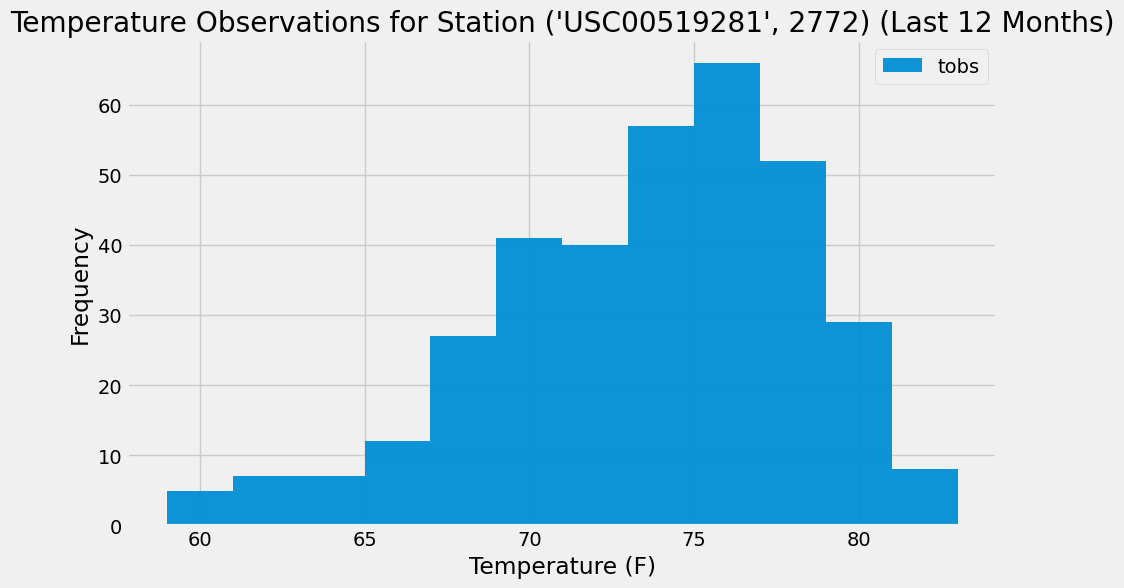

In [177]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Convert the query results to a Pandas DataFrame and plot the results as a histogram

temperature_df = pd.DataFrame(temperature_data, columns=['tobs'])

temperature_df.plot(kind='hist', bins=12, alpha=0.95, figsize=(10,6))
plt.xlabel("Temperature (F)")
plt.title(f"Temperature Observations for Station {most_active_station} (Last 12 Months)")
plt.show()

# Close session

In [178]:
# Close Session
session.close()